<a href="https://colab.research.google.com/github/PerlaLunaD/analisis-salarial-por-industria/blob/main/An%C3%A1lisis__Salarial__por__Industria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. El problema del negocio

Como afecta el grado academico y la especializacion al salario en diferenrtes tipos de trabajo dentro de una industria en especifico.

### 2. Importando librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 3. Carga y exploracion de datos (una primer mirada al dataset)

In [13]:
data = pd.read_csv ('/content/train_features2.csv')

In [14]:
print(data.shape)

(1000000, 10)


In [15]:
data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Unnamed: 8,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,NaN,17,NaN,NaN
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16,NaN,163.0


In [16]:
data.tail()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Unnamed: 8,salary
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94,NaN,88.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35,NaN,160.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81,NaN,64.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5,NaN,149.0
999999,JOB1362685407686,COMP59,JUNIOR,BACHELORS,NONE,EDUCATION,20.0,11,NaN,88.0


In [17]:
data.count()

,0
jobId,1000000
companyId,1000000
jobType,1000000
degree,1000000
major,1000000
industry,1000000
yearsExperience,999999
milesFromMetropolis,1000000
Unnamed: 8,0
salary,999999


### 3. Limpieza

In [18]:
cols =['jobId','companyId','jobType','degree','major','industry','yearsExperience','milesFromMetropolis', 'Unnamed: 8', 'salary']

df = data[cols]

In [19]:
df = data[cols]

In [20]:
df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Unnamed: 8,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,NaN,17,NaN,NaN
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94,NaN,88.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35,NaN,160.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81,NaN,64.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5,NaN,149.0


In [21]:
df.rename(columns={'jobId':'Id'},inplace=True)
df.rename(columns={'companyId':'CompanyId'},inplace=True)
df.rename(columns={'jobType':'JobType'},inplace=True)
df.rename(columns={'yearsExperience	':'YearsExperience	'},inplace=True)
df.rename(columns={'milesFromMetropolis':'MilesFromMetropolis'},inplace=True)
df.rename(columns={'Unnamed: 8':'Unnamed'},inplace=True)
#se modifico el nombre de los emcabezados

In [22]:
df

,Id,CompanyId,JobType,degree,major,industry,yearsExperience,MilesFromMetropolis,Unnamed,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,NaN,17,NaN,NaN
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94,NaN,88.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35,NaN,160.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81,NaN,64.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5,NaN,149.0


In [23]:
df['yearsExperience'].unique()

array([10.,  3., nan,  8.,  2., 23.,  9.,  1., 17., 24.,  7., 21., 13.,
       11., 14., 18., 20., 12., 15., 22.,  0., 19.,  5.,  4., 16.,  6.])

In [24]:
df.drop_duplicates(inplace=True)  # Elimina filas duplicadas

In [25]:
len(df)

1000000

In [26]:
df1 = df.copy()

In [27]:
df1

,Id,CompanyId,JobType,degree,major,industry,yearsExperience,MilesFromMetropolis,Unnamed,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,NaN,17,NaN,NaN
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94,NaN,88.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35,NaN,160.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81,NaN,64.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5,NaN,149.0


In [30]:
mediana = df1['yearsExperience'].median()
mediana

12.0

In [31]:
df1['yearsExperience'] = df1['yearsExperience'].fillna(mediana)

In [32]:
df1

,Id,CompanyId,JobType,degree,major,industry,yearsExperience,MilesFromMetropolis,Unnamed,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,12.0,17,NaN,NaN
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94,NaN,88.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35,NaN,160.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81,NaN,64.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5,NaN,149.0


In [33]:
mediana = df1['salary'].median()
mediana

114.0

In [34]:
df1['salary'] = df1['salary'].fillna(mediana)

In [35]:
df1

,Id,CompanyId,JobType,degree,major,industry,yearsExperience,MilesFromMetropolis,Unnamed,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83,NaN,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73,NaN,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38,NaN,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,12.0,17,NaN,114.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16,NaN,163.0
...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94,NaN,88.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35,NaN,160.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81,NaN,64.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5,NaN,149.0


In [36]:
# Eliminar la fila con el índice 'unmade'
df1 = df1.drop('Unnamed', axis=1)

In [37]:
df1

,Id,CompanyId,JobType,degree,major,industry,yearsExperience,MilesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,12.0,17,114.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16,163.0
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94,88.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35,160.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81,64.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5,149.0


In [38]:
# Seleccionar la columna de salarios
columna_salarios = 'salary'

# Calcular el IQR
Q1 = df1[columna_salarios].quantile(0.25)
Q3 = df1[columna_salarios].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df1[(df1[columna_salarios] < limite_inferior) | (df1[columna_salarios] > limite_superior)]

# Mostrar los outliers
print(outliers)

                      Id CompanyId         JobType     degree        major  \
266     JOB1362684407953    COMP30             CEO    MASTERS      BIOLOGY   
362     JOB1362684408049    COMP38             CTO    MASTERS         NONE   
560     JOB1362684408247    COMP53             CEO    MASTERS      BIOLOGY   
670     JOB1362684408357    COMP26             CEO    MASTERS         MATH   
719     JOB1362684408406    COMP54  VICE_PRESIDENT   DOCTORAL      BIOLOGY   
...                  ...       ...             ...        ...          ...   
998516  JOB1362685406203    COMP29             CFO    MASTERS  ENGINEERING   
999249  JOB1362685406936    COMP30             CEO       NONE         NONE   
999280  JOB1362685406967     COMP2             CFO  BACHELORS     BUSINESS   
999670  JOB1362685407357    COMP20             CEO   DOCTORAL   LITERATURE   
999893  JOB1362685407580     COMP9             CEO   DOCTORAL  ENGINEERING   

       industry  yearsExperience  MilesFromMetropolis  salary  

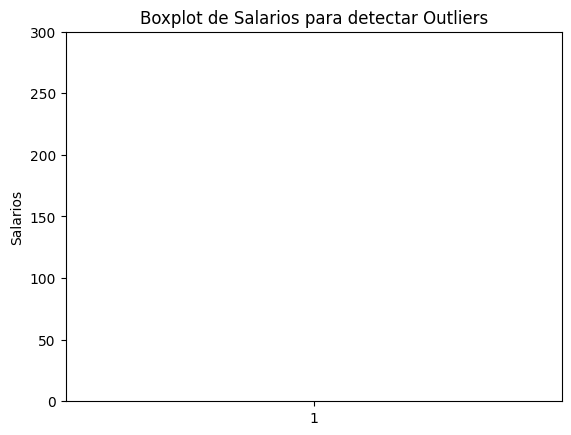

In [39]:

plt.boxplot(df[columna_salarios])
plt.title('Boxplot de Salarios para detectar Outliers')
plt.ylabel('Salarios')
plt.ylim(0, 300)
plt.show()